<a href="https://colab.research.google.com/github/LiamSwick/Actuator-Scripts/blob/main/Actuator_LM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [10]:
drive.mount('/content/drive')
path1 = "C28-1000N.csv"
path2 = "C28-2000N.csv"
path3 = "C28-3000N.csv"
df1 = pd.read_csv(f'/content/drive/MyDrive/{path1}', sep=';', header=0)
df2 = pd.read_csv(f'/content/drive/MyDrive/{path2}', sep=';', header=0)
df3 = pd.read_csv(f'/content/drive/MyDrive/{path3}', sep=';', header=0)

f_1000N = 1000*np.ones_like(df1['Torque actual value [mNm]'])
f_2000N = 2000*np.ones_like(df2['Torque actual value [mNm]'])
f_3000N = 3000*np.ones_like(df3['Torque actual value [mNm]'])
df1['Force [N]'] = f_1000N
df2['Force [N]'] = f_2000N
df3['Force [N]'] = f_3000N

Mounted at /content/drive


In [11]:
df = pd.concat([df1, df2, df3], axis=0)
df.drop(columns=['Unnamed: 8'], inplace=True)
df.head()
#df.tail()

,Time (s),Current actual value [mA],Time (s).1,Torque actual value [mNm],Time (s).2,Velocity actual value [rpm],Time (s).3,Velocity demand value [rpm],Force [N]
0,0.023,4456.495,0.040,184,0.056,0.0,0.072,0.0,1000
1,0.135,4456.495,0.152,184,0.167,0.0,0.184,0.0,1000
2,0.247,3999.976,0.264,205,0.283,0.0,0.295,0.0,1000
3,0.375,4217.366,0.392,205,0.406,0.0,0.423,0.0,1000
4,0.488,4217.366,0.504,194,0.523,0.0,0.535,0.0,1000


In [12]:
up_mask = df['Velocity actual value [rpm]'] > 0
down_mask = df['Velocity actual value [rpm]'] < 0
up_df = df[up_mask]
down_df = df[down_mask]
up_clean_mask = up_df['Torque actual value [mNm]'] > 0
down_clean_mask = down_df['Torque actual value [mNm]'] > 0
up_clean = up_df[up_clean_mask]
down_clean = down_df[down_clean_mask]

<Axes: xlabel='Torque actual value [mNm]', ylabel='Count'>

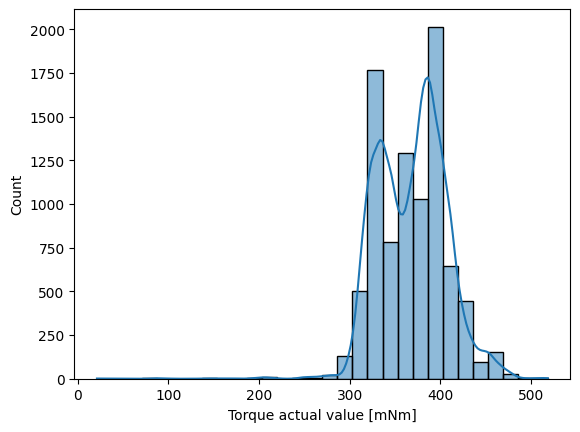

In [13]:
plt.figure()
sns.histplot(up_clean['Torque actual value [mNm]'], bins = 30, kde = True)

<Axes: xlabel='Current actual value [mA]', ylabel='Count'>

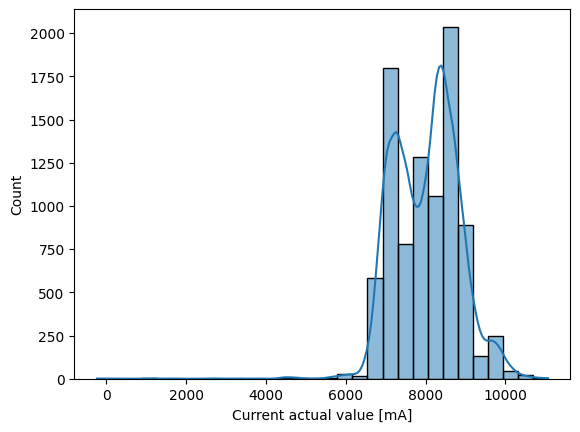

In [14]:
plt.figure()
sns.histplot(up_clean['Current actual value [mA]'], bins = 30, kde = True)

<Axes: xlabel='Velocity actual value [rpm]', ylabel='Count'>

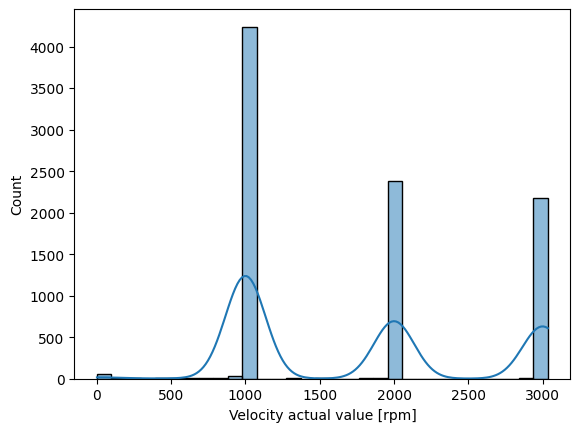

In [15]:
plt.figure()
sns.histplot(up_clean['Velocity actual value [rpm]'], kde = True)

<Axes: >

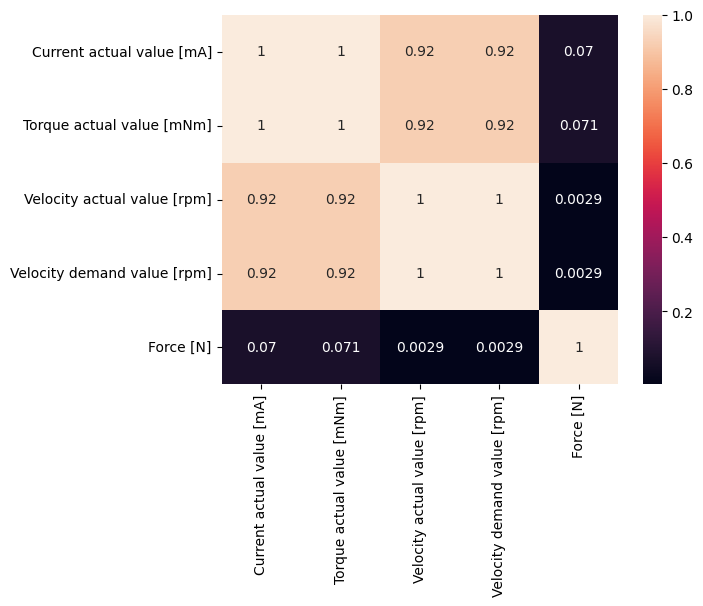

In [16]:
subset = df.drop(columns = ['Time (s)', 'Time (s).1', 'Time (s).2','Time (s).3'])
plt.figure()
sns.heatmap(subset.corr(), annot=True)

In [17]:
X = up_clean[['Force [N]', 'Velocity actual value [rpm]']]
y = up_clean['Torque actual value [mNm]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 7159 samples
Testing set size: 1790 samples


In [45]:
lm = LinearRegression()
lmod_up = lm.fit(X_train, y_train)
r2 = lmod_up.score(X_train, y_train)
#print(f"The model explains {r2*100:.2f}% of the variability in the data.")
print(lmod_up.intercept_)
lmod_up.score(X_train, y_train)

224.21354830999934


0.6175325295436713

In [19]:
y_pred = lmod_up.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f'RMSE: {np.sqrt(mse): .2f}')

MSE: 535.88
MAE: 18.01
RMSE:  23.15


In [20]:
y_pred = lmod_up.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSPE: {mse:.2f}')
print(f'MAPE: {mae:.2f}')
print(f'RMSPE: {np.sqrt(mse):.2f}')

MSPE: 628.82
MAPE: 18.35
RMSPE: 25.08


In [29]:
up_mod = sm.OLS(y_train, X_train)

In [25]:
results = up_mod.fit()
print(results.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Torque actual value [mNm]   R-squared (uncentered):                   0.982
Model:                                   OLS   Adj. R-squared (uncentered):              0.982
Method:                        Least Squares   F-statistic:                          1.919e+05
Date:                       Sat, 26 Jul 2025   Prob (F-statistic):                        0.00
Time:                               21:10:39   Log-Likelihood:                         -38193.
No. Observations:                       7159   AIC:                                  7.639e+04
Df Residuals:                           7157   BIC:                                  7.640e+04
Df Model:                                  2                                                  
Covariance Type:                   nonrobust                                                  
                                  coef    std err 